In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
data = [] #defining empty array for data entry, if you have your own data load it here
count = 1

In [3]:
while True: #entering data, if you loaded your data then skip this cell
    d = input("Enter student "+ str(count) +" weight: ")
    if d == "n" or d == "N": #stop entering data by entering 'n' in the entry
        break
    if d == "-" or d == "c" or d == "C": #clear last entered data by pressing 'c'
        data.remove(data[count-2])
        count -=1
        d = input("Enter student "+ str(count) +" weight: ")
    data.append(float(d))
    count += 1 
    #you can run this again to add data

Enter student 1 weight:  52
Enter student 2 weight:  45
Enter student 3 weight:  47
Enter student 4 weight:  58
Enter student 5 weight:  59
Enter student 6 weight:  51
Enter student 7 weight:  52
Enter student 8 weight:  53
Enter student 9 weight:  56
Enter student 10 weight:  74
Enter student 11 weight:  84
Enter student 12 weight:  32
Enter student 13 weight:  45
Enter student 14 weight:  47
Enter student 15 weight:  58
Enter student 16 weight:  47
Enter student 17 weight:  49
Enter student 18 weight:  58
Enter student 19 weight:  51
Enter student 20 weight:  52
Enter student 21 weight:  59
Enter student 22 weight:  53
Enter student 23 weight:  58
Enter student 24 weight:  57
Enter student 25 weight:  51
Enter student 26 weight:  52
Enter student 27 weight:  56
Enter student 28 weight:  57
Enter student 29 weight:  58
Enter student 30 weight:  52
Enter student 31 weight:  53
Enter student 32 weight:  58
Enter student 33 weight:  c
Enter student 32 weight:  48
Enter student 33 weight:

(8,
 52.111111111111114,
 20.079250391792428,
 array([ 4.20604216, 52.61682749,  5.80560333]),
 array([[ 5.68669921e-01,  7.27541417e-08, -5.23396635e-01],
        [ 7.27541417e-08,  1.44518305e+00, -9.64319701e-08],
        [-5.23396635e-01, -9.64319701e-08,  1.44518305e+00]]))

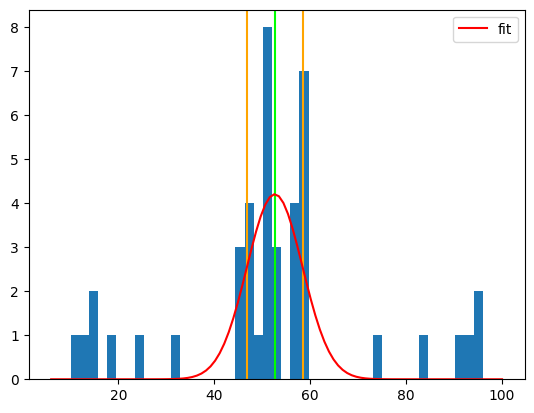

In [6]:
# data = np.random.normal(55,30,1000) #uncomment this if you dont want to enter data but see how the code works with random data
bin_size = 20
hist, bin_edges = np.histogram(data, bins = bin_size)
xaxis = np.zeros(len(hist),dtype=float)

for i in range(len(hist)):
    xaxis[i]=(bin_edges[i+1]+bin_edges[i])/2
    
yaxis=hist

A = np.max(yaxis)
M = np.average(xaxis, weights = yaxis)
S = (np.sum(yaxis*(xaxis-M)**2)/np.sum(yaxis))**0.5
def gaussian(x, A,M,S):
    return A*2.718281828**(-0.5*(((x-M)/S)**2))

parameters, covariance = curve_fit(gaussian, xaxis, yaxis, p0=[A, M, S], maxfev = 5000)


x_curve = np.linspace(np.min(xaxis)-5,np.max(xaxis)+5,100)
y_curve = gaussian(x_curve, *parameters)
# plt.plot(xaxis, yaxis, 'o', label='data')
plt.hist(data, bins=bin_size)
plt.axvline(parameters[1] + parameters[2], color = '#FFA500')
plt.axvline(parameters[1] - parameters[2], color = '#FFA500')
plt.axvline(parameters[1], color = '#00FF00')
plt.plot(x_curve, y_curve, 'r-', label='fit')

plt.legend()
A, M, S, parameters, covariance